# Categorical Data

A categorical variable, as the name suggests, is used to represent categories or labels. For instance, a categorical variable could represent major **cities in the world, the four seasons in a year, or the industry** (oil, travel, technology) of a company. The number of category values is always **finite** in a real-world dataset. **The values may be represented numerically. However, unlike other numeric variables, the values of a categorical variable cannot be ordered with respect to one another.** (Oil is neither greater than nor less than travel as an industry type.) They are called **nonordinal.**

A simple question can serve as litmus test for whether something should be a categorical variable: **“Does it matter how different two values are, or only that they are different?”** A stock price of $500 is five times higher than a price of $100. So, stock price should be represented by a continuous numeric variable. The industry of the company (oil, travel, tech, etc.), on the other hand, should probably be categorical.

**Large categorical variables** are particularly common in transactional records. For instance, many web services track users using an ID, which is a categorical variable with hundreds to hundreds of millions of values, depending on the number of unique users of the service. The IP address of an internet transaction is another example of a large categorical variable. They are categorical variables because, **even though user IDs and IP addresses are numeric, their magnitude is usually not relevant** to the task at hand. For instance, the IP address might be relevant when doing **fraud detection on individual** transactions—some IP addresses or subnets may generate more fraudulent transactions than others. But a subnet of 164.203.x.x is not inherently more fraudulent than 164.202.x.x; the numeric value of the subnet does not matter.

**The vocabulary of a document corpus can be interpreted as a large categorical variable**, with the categories being unique words. It can be computationally expensive to represent so many distinct categories. If a category (e.g., word) appears multiple times in a data point (document), then we can represent it as a count, and represent all of the categories through their **count statistics. This is called bin counting**. We start this discussion with common representations of categorical variables, and eventually meander our way to a discussion of bin counting for large categorical variables, which are very common in modern datasets.

# Encoding Categorical Variables

**The categories of a categorical variable are usually not numeric**.1 For example, eye color can be “black,” “blue,” “brown,” etc. Thus, an encoding method is needed to turn these nonnumeric categories into numbers. **It is tempting to simply assign an integer, say from 1 to k**, to each of k possible categories—but the resulting values would be orderable against each other, which should not be permissible for categories. So, let’s look at some alternatives.


## One-Hot Encoding
**A better method is to use a group of bits.** Each bit represents a possible category. If the variable cannot belong to multiple categories at once, then **only one bit in the group can be “on.”** This is called one-hot encoding, and it is implemented in **scikit-learn** as sklearn.preprocessing.OneHotEncoder. Each of the bits is a feature. Thus, **a categorical variable with k possible categories is encoded as a feature vector of length k.**


 <img src="https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png"> 

One-hot encoding is very simple to understand, but it uses one more bit than is strictly necessary. If we see that k–1 of the bits are 0, then the last bit must be 1 because the variable must take on one of the k values. Mathematically, one can write this constraint as **“the sum of all bits must be equal to 1”:
e 1 + e 2 + . . . + e k = 1**

Thus, we have a linear dependency on our hands. **Linear dependent features, as we discovered in Chapter 4, are slightly annoying because they mean that the trained linear models will not be unique**. Different linear combinations of the features can make the same predictions, so we would need to jump through extra hoops to understand the effect of a feature on the prediction.


## Dummy Coding

The problem with **one-hot encoding is that it allows for k degrees of freedom, while the variable itself needs only k–1**. Dummy coding removes the extra degree of freedom by using only k–1 features in the representation. **One feature** is thrown under the bus and represented by **the vector of all zeros**. This is known as the reference category. Dummy coding and one-hot encoding are both implemented in Pandas as pandas.get_dummies.

The outcome of modeling with dummy coding is more interpretable than with one-hot encoding. This is easy to see in a simple linear regression problem. Suppose we have some data about apartment rental prices in three cities: San Francisco, New York, and Seattle (see Table 5-3).
Table 5-3. Toy dataset of apartment prices in three cities

In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.DataFrame({'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


In [3]:
#Vamos a crear las dummies


,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [4]:
#Programamos una regresion lineal



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([ 166.66666667,  666.66666667, -833.33333333])

3333.3333333333335

In [8]:
# One-hot encoding weights + intercept


3333.3333333333335

In [10]:
#Hacemos dummies eliminando una de las columnas



,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


In [11]:
#Hacemos la nueva regresion



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([  500., -1000.])

3500.0000000000005

### Effect Encoding

In [14]:
# Dummy coding weights + intercept


,Rent,city_SF,city_Seattle
0,3999,1.0,0.0
1,4000,1.0,0.0
2,4001,1.0,0.0
3,3499,-1.0,-1.0
4,3500,-1.0,-1.0
5,3501,-1.0,-1.0
6,2499,0.0,1.0
7,2500,0.0,1.0
8,2501,0.0,1.0


array([ 666.66666667, -833.33333333])

3333.3333333333335

In [19]:
# illustration of rental price in cities
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4, color_codes=True)

C:\Users\arana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


AxesSubplot(0.125,0.125;0.775x0.755)


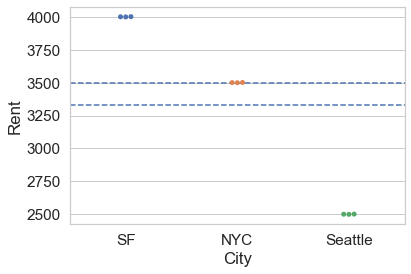

One-hot encoding weights:  [ 166.66666667  666.66666667 -833.33333333]  and intercept:  3333.3333333333335
Dummy encoding weights:  [  500. -1000.]  and intercept:  3500.0



## Pros and Cons of Categorical Variable Encodings

One-hot, dummy, and effect coding are very similar to one another. **They each have pros and cons. One-hot encoding is redundant, which allows for multiple valid models for the same problem.** The nonuniqueness is sometimes problematic for interpretation, **but the advantage is that each feature clearly corresponds to a category**. Moreover, missing data can be encoded as the all-zeros vector, and the output should be the overall mean of the target variable.

**Dummy coding and effect coding are not redundant**. They give rise to unique and interpretable models. The downside of dummy coding is that **it cannot easily handle missing data**, since the all-zeros vector is already mapped to the reference category. It also encodes the effect of each category relative to the reference category, which may look strange.

**Effect coding avoids this problem by using a different code for the reference category, but the vector of all –1’s is a dense vector**, which is expensive for both storage and computation. For this reason, popular ML software packages such as Pandas and scikit-learn have opted for dummy coding or one-hot encoding instead of effect coding.

**All three encoding techniques break down when the number of categories becomes very large.** Different strategies are needed to handle extremely large categorical variables. 
